# 机器学习 - 红酒聚类k_means
---
- 合肥工业大学宣城校区
- 机器学习大作业第一类红酒聚类实验算法替换工作

以下的操作主要包括:
1. 数据导入前的预准备与数据导入
2. 看看数据之间
3. 开始操作数据
4. 模型构建与测试效果
5. k值的验证与确认

## 数据导入与相关准备

### 相关准备
    分别有
- 解决中文字符在图表中显示不正确的问题。Matplotlib默认的字体设置可能不支持中文字符，这会导致中文字符显示为乱码或者根本不显示。通过设置font.sans-serif参数，可以指定一个支持中文字符的字体名称。 - mpl.rcParams["font.sans-serif"] = ["SimHei"]
- 有时候，字体更改后，会导致坐标轴中的部分字符无法正常显示，此时需要更改axes.unicode_minus参数
- 对于过时警告的忽略


In [153]:
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

#部分警告忽略
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)


### 数据导入与出head数据查看
- 使用Pandas加载数据，并将读取的数据存储在名为wine的DataFrame中，然后调用wine.head()显示wine这个DataFrame的前5行数据，快速检查数据集的内容和结构


- 那么通过初步看这五行数据可以看出，其中的数据包含了小数，一位数，两位数，三位数，四位数，一共还是熟悉的十三个变量，其中第一列是class类别，那么我们后面会使用的是k_means来进行聚类，那么这个数据不同变量之间的差距倍数过大的话当然可能会造成一些问题，我们就可以思索着后面对数据进行标准化处理之类的了

In [154]:
import pandas as pd
wine=pd.read_csv('wine2.csv')
wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 看看数据之间嗯

- 在这里的话首先是看了一下数据有没有缺失值，使用isnull()检测wine DataFrame中的所有缺失值，然后对每一列使用sum()函数，统计每一列中缺失值的总数，那么可以看到很幸运啊，没有缺失值,那么接下来我们再去看看数据的其他方面。

In [129]:
wine.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

- 来看看数据箱型图看看数据位置和分散性的信息

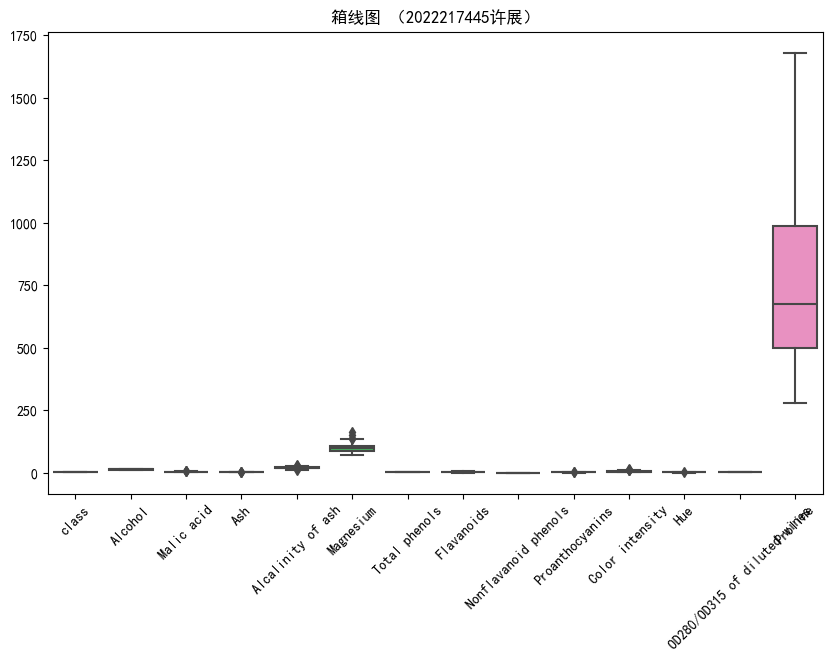

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=wine)
plt.title('箱线图 （2022217445许展）')
plt.xticks(rotation=45)  # 旋转标签，使其更易于阅读
plt.show()

- 通过箱型图来看看数值变量的分布，以及检测异常值，那么这个箱型图的话，我们可以看见只有最后一个变量貌似有点小问题，其他的都挺集中的，那么我们不妨在下面对这一列再详细进行看看

均值: 746.8932584269663
中位数: 673.5
标准差: 314.9074742768489
最小值: 278
最大值: 1680
count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: Proline, dtype: float64


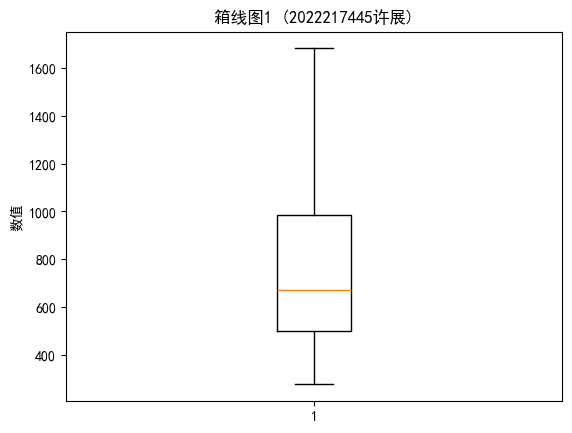

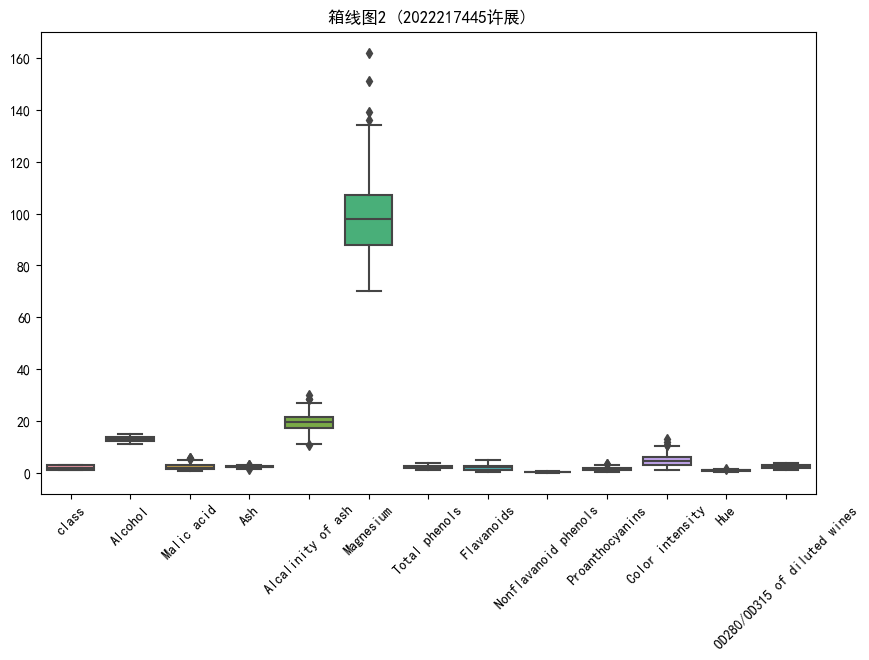

In [156]:
# 选择最后一列
last_column = wine.iloc[:, -1]

# 计算统计特性
mean_value = last_column.mean()
median_value = last_column.median()
std_dev_value = last_column.std()
min_value = last_column.min()
max_value = last_column.max()

# 打印结果
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")
print(f"标准差: {std_dev_value}")
print(f"最小值: {min_value}")
print(f"最大值: {max_value}")

# 查看分布情况
print(last_column.describe())

# 绘制箱线图

plt.boxplot(last_column)
plt.title("箱线图1 (2022217445许展)")
plt.ylabel("数值")
plt.show()

#顺便看看其他列
# lsecond_column = wine.iloc[:, -2]

# plt.boxplot(lsecond_column)
# plt.title("箱线图")
# plt.ylabel("数值")
# plt.show()

# 首先，选择除了最后一列之外的所有列
wine_without_last_column = wine.iloc[:, :-1]

# 然后，使用Seaborn的boxplot函数绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=wine_without_last_column)
plt.title('箱线图2 (2022217445许展)')
plt.xticks(rotation=45)  # 旋转标签，使其更易于阅读
plt.show()


- 开始的话本来是想先对最后一列做一个操作的，但是实际当我们画出剔除最后一列的数据时可以看到还是有很多"火种"的，于此循环剔除每个再进行分别处理意义不大，回味到最初的看看，其中的数据包含了小数，一位数，两位数，三位数，四位数这种成千上万的差距无疑需要进行统一归一化处理，特别是在k_means需要计算维度距离来聚类，所以在这里我们先止步于此。

In [132]:
# # 计算Q1和Q3
# Q1 = last_column.quantile(0.25)
# Q3 = last_column.quantile(0.75)

# # 计算IQR
# IQR = Q3 - Q1

# # 计算异常值的阈值
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # 识别异常值
# outliers = last_column[(last_column < lower_bound) | (last_column > upper_bound)]

# # 打印结果
# print(f"第一四分位数 (Q1): {Q1}")
# print(f"第三四分位数 (Q3): {Q3}")
# print(f"四分位距 (IQR): {IQR}")
# print(f"异常值下界: {lower_bound}")
# print(f"异常值上界: {upper_bound}")
# print(f"异常值: {outliers}")

# # 替换异常值为中位数
# median_value = last_column.median()
# last_column[last_column < lower_bound] = median_value
# last_column[last_column > upper_bound] = median_value


# # 绘制箱线图

# plt.boxplot(last_column)
# plt.title("箱线图")
# plt.ylabel("数值")
# plt.show()

- 通过散点图观察数据


- 这里则是看一看数据之间的联系，从最初使用mpl_toolkits.mplot3d来创建一个3D散点图，先看看最前面三个特征的三维关系图，那么感觉三维图看关系有点困难，果断选择二维进行观察，这里使用Seaborn的pairplot函数来创建一个.pairplot，展示DataFrame中所有变量之间的关系


- 至于这里面输出的红褐色啊，函数过时，我们的pandas包有点太先进了，没有关系啊，因为我们最后也不用这个函数，只是看看

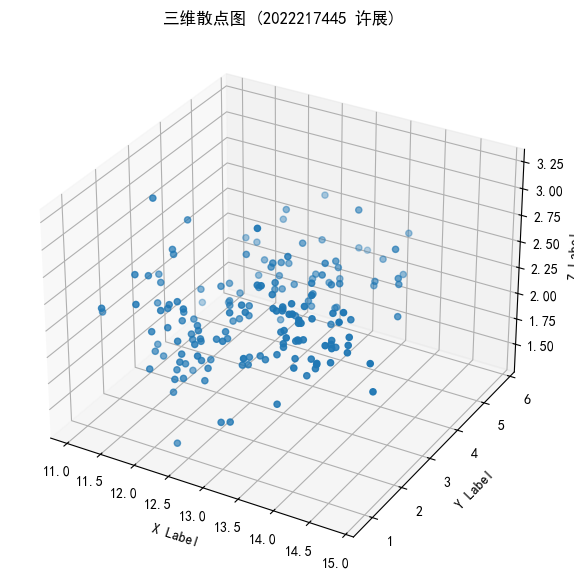

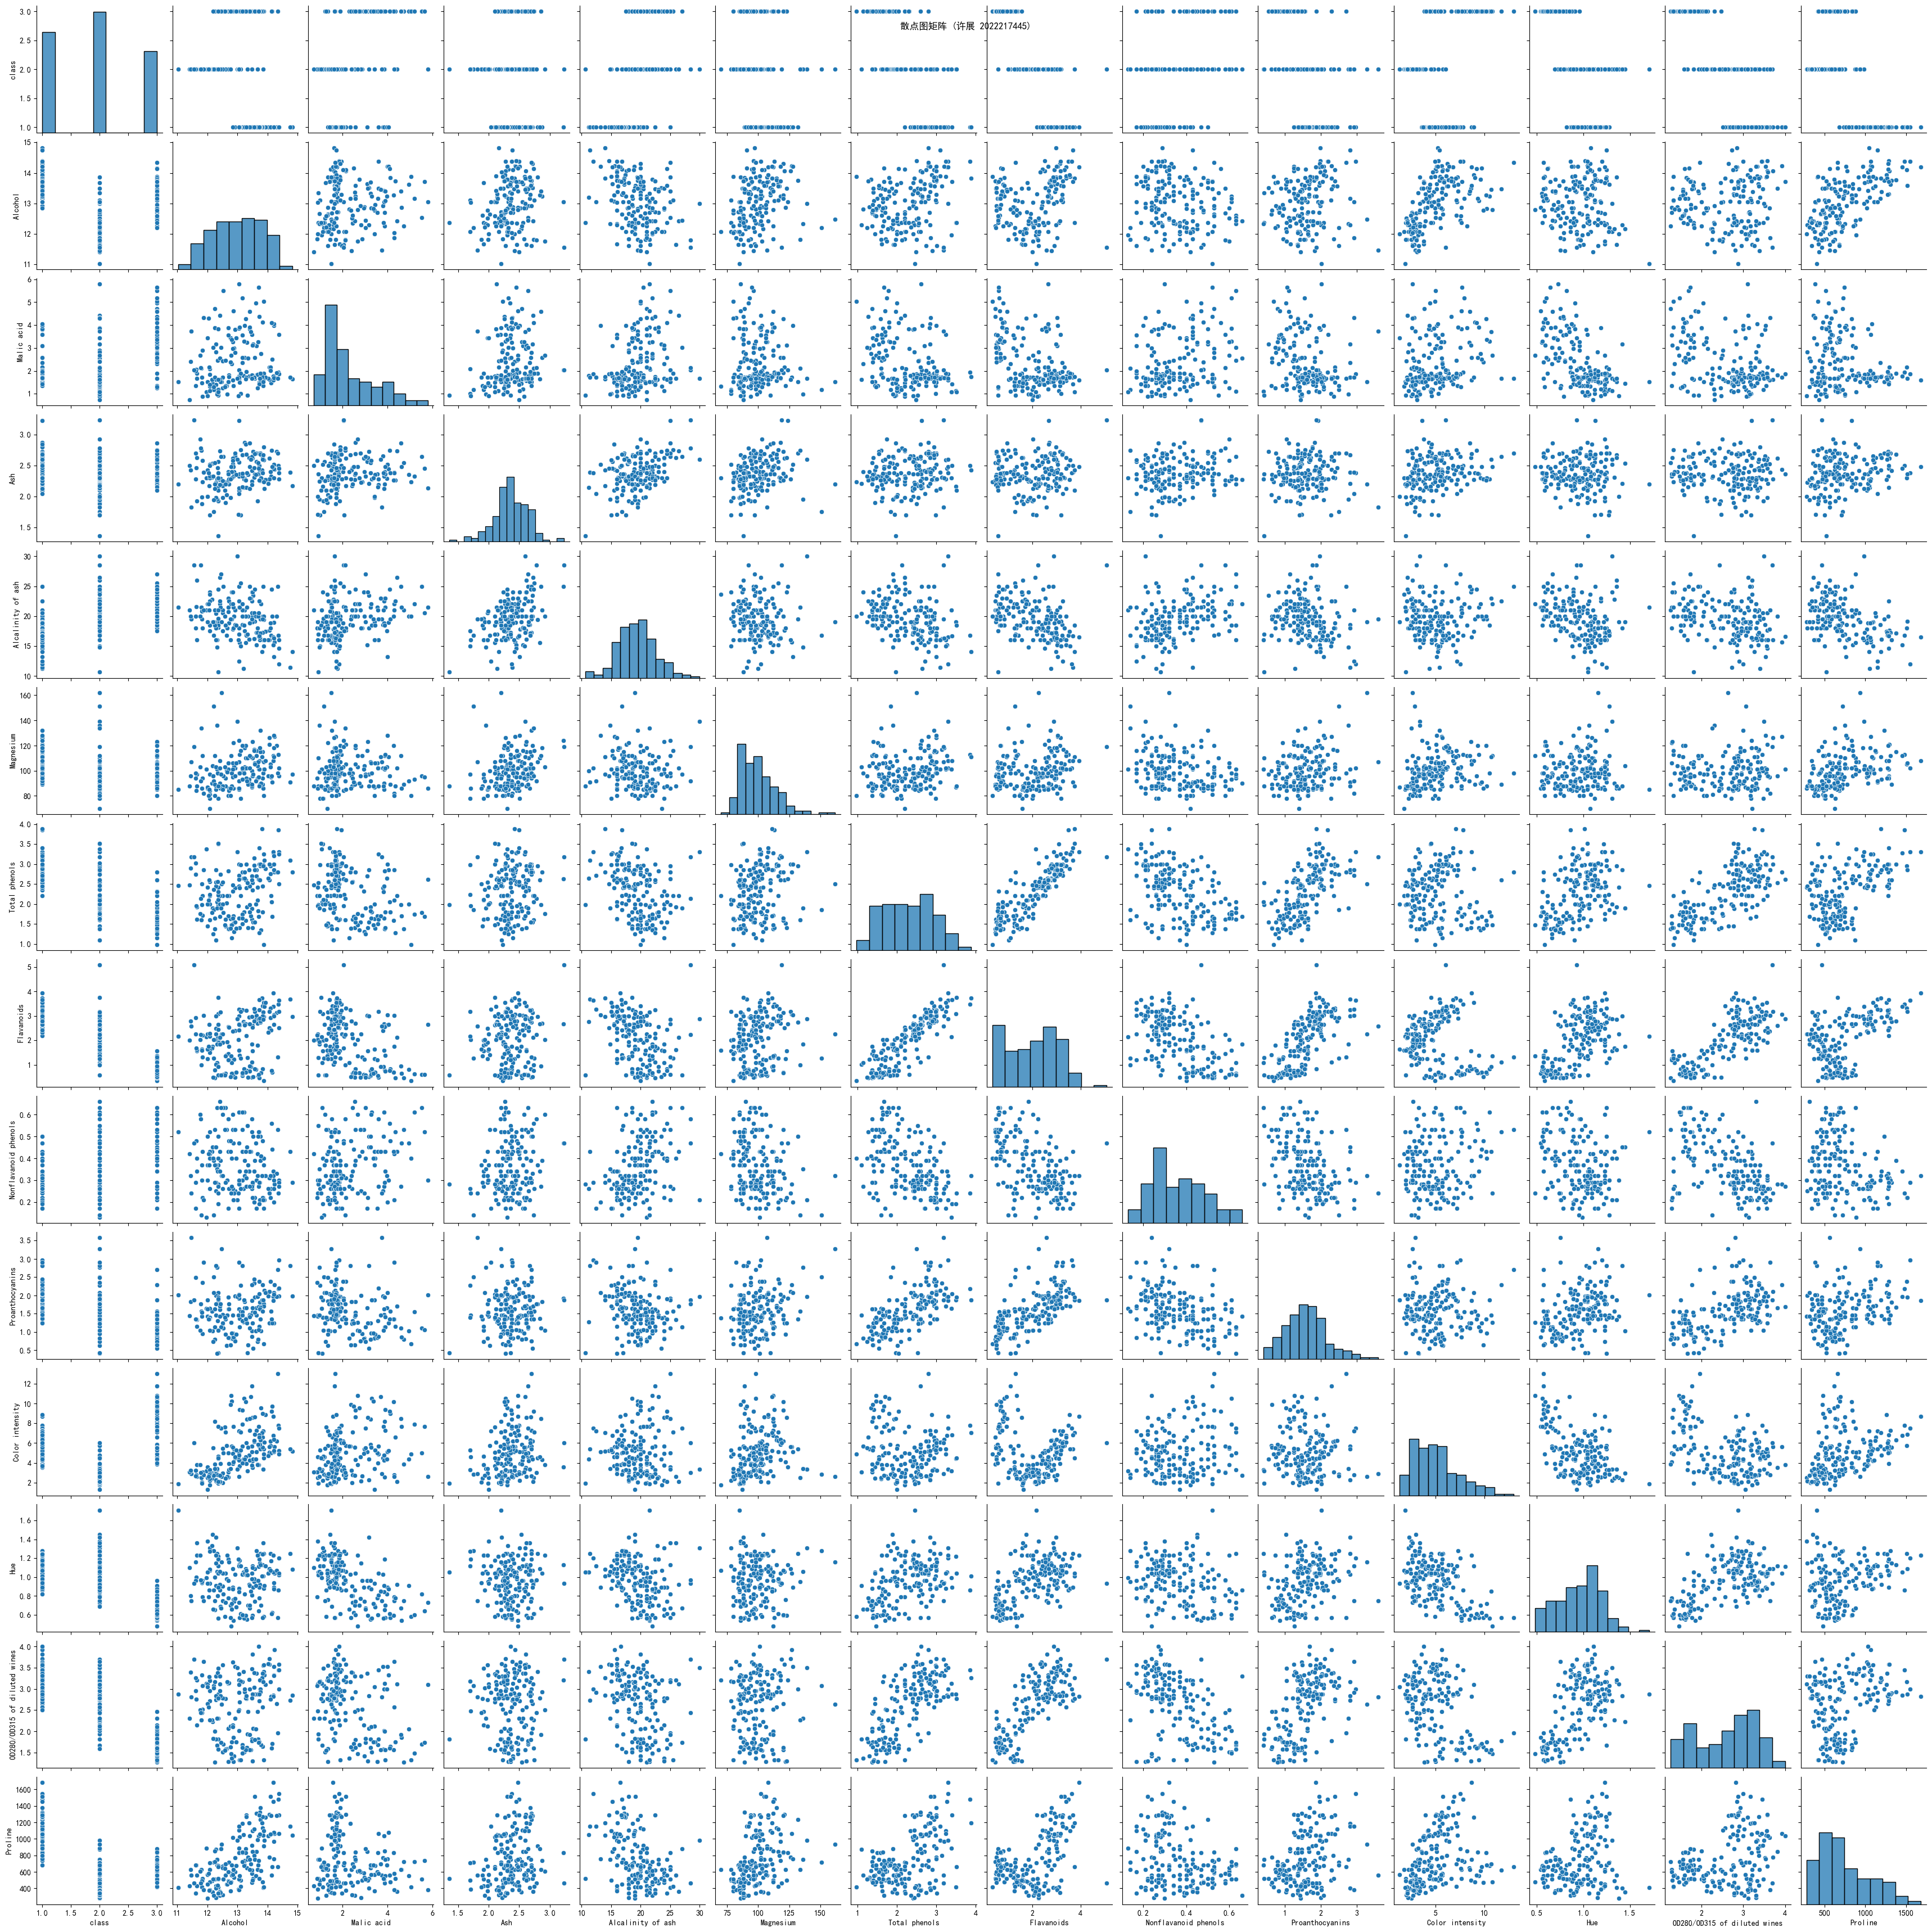

In [164]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wine.iloc[:, 1], wine.iloc[:, 2], wine.iloc[:, 3])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('三维散点图 (2022217445 许展)')
plt.show()

sns.pairplot(wine)
plt.suptitle('散点图矩阵 (许展 2022217445)') 
plt.show()


- 在上图的话，这个三维图我们不好看出什么关系，而对于sns.pairplot(wine)的图形，我们可以看见在目前的情况下其中Flvanoids和Total phenols之间有较强的相关性，其余有些之间也有一部分，但是不多，可以看到整体来说还是比较杂的，所以接下类我们再用DataFrame的wine.corr()方法，计算DataFrame中各列之间的相关性系数。默认情况下，计算Pearson相关系数。,然后使用Seaborn的heatmap函数绘制热力图

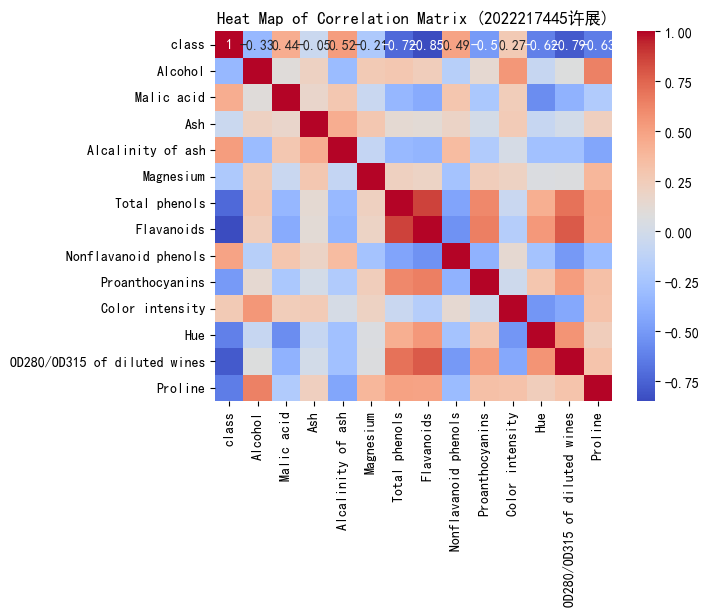

In [158]:
# 计算相关性矩阵
corr_matrix = wine.corr()

# 绘制热力图
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlation Matrix (2022217445许展)')
plt.show()


- 那么在上面的热力图中我们也可以清晰看见Flavanoids和Total phenols之间有强相关性，并且和OD280/OD315 of diluted wines有着稍逊的相关性，那么其实这通常意味着这几个特征在某种程度上具有冗余信息，因为它们可能反映了数据中相似的结构或变化趋势，处理的话我们可以考虑特征选择，主成分分析(PCA),特征变换或忽略相关性等策略。

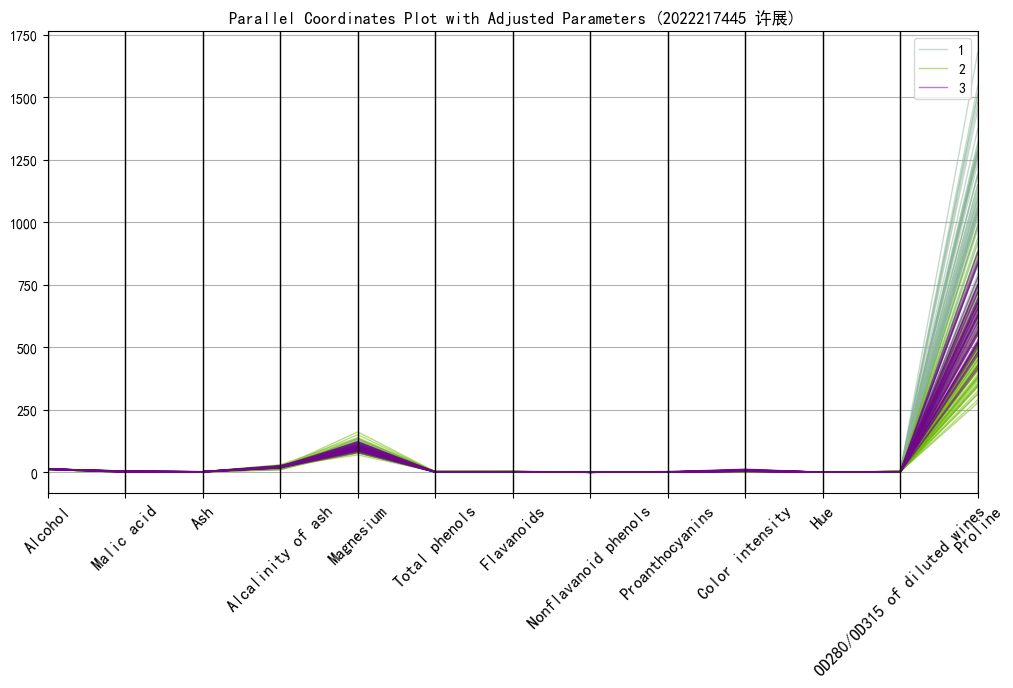

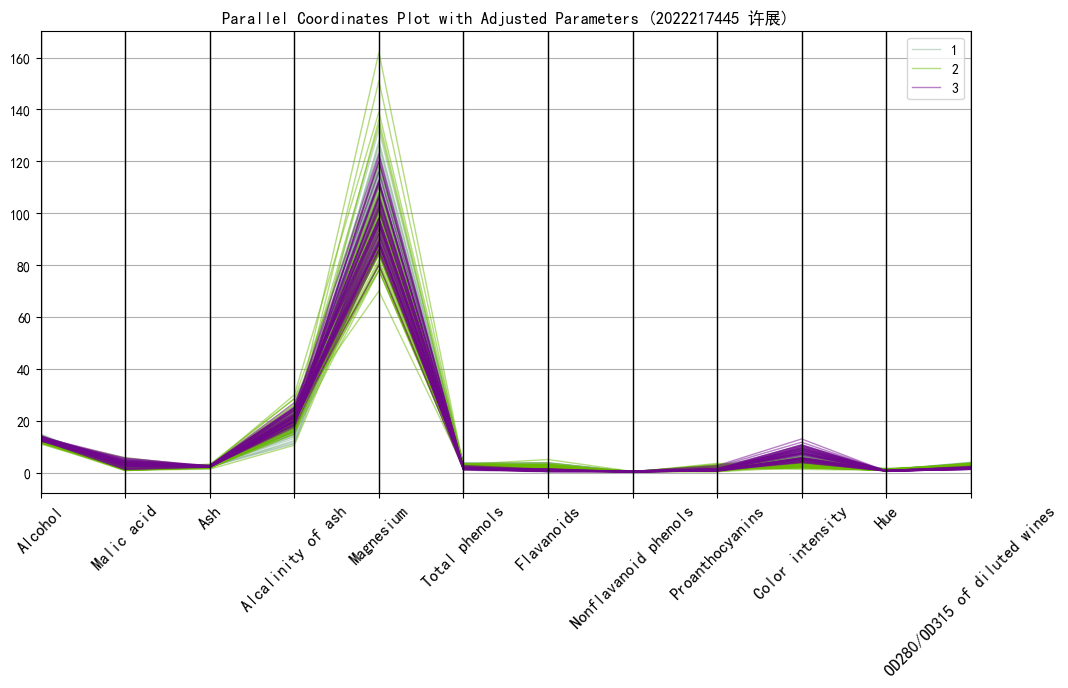

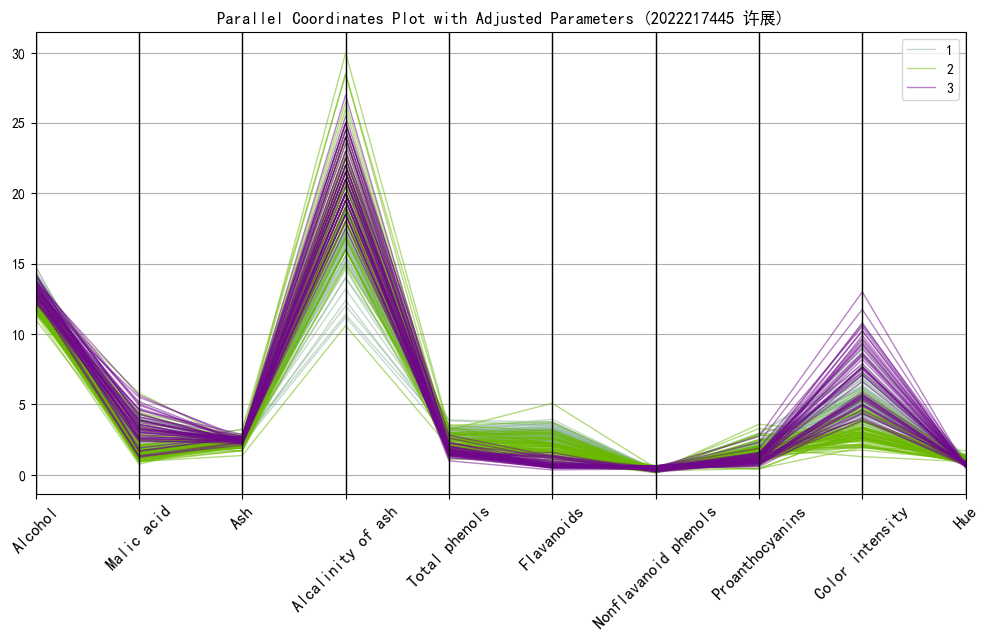

In [159]:
from pandas.plotting import parallel_coordinates
# 绘制平行坐标图
plt.figure(figsize=(12, 6))  # 增加图形大小
parallel_coordinates(wine, 'class', linewidth=1, alpha=0.5)  # 减小线条宽度，调整透明度

plt.xticks(rotation=45)  # 旋转标签，使其更易于阅读
plt.xticks(fontsize=12)  # 增大标签字体大小
plt.title('Parallel Coordinates Plot with Adjusted Parameters (2022217445 许展)')
plt.show()

plt.figure(figsize=(12, 6))  # 增加图形大小
parallel_coordinates(wine_without_last_column, 'class', linewidth=1, alpha=0.5)  # 减小线条宽度，调整透明度
plt.xticks(rotation=45)  # 旋转标签，使其更易于阅读
plt.xticks(fontsize=12)  # 增大标签字体大小
plt.title('Parallel Coordinates Plot with Adjusted Parameters (2022217445 许展)')
plt.show()

wine_without_fifth_column = wine_without_last_column.iloc[:, [0, 1, 2, 3, 4, 6,7,8,9,10,11 ]]
plt.figure(figsize=(12, 6))  # 增加图形大小
parallel_coordinates(wine_without_fifth_column, 'class', linewidth=1, alpha=0.5)  # 减小线条宽度，调整透明度
plt.xticks(rotation=45)  # 旋转标签，使其更易于阅读
plt.xticks(fontsize=12)  # 增大标签字体大小
plt.title('Parallel Coordinates Plot with Adjusted Parameters (2022217445 许展)')
plt.show()

- 于此，我们使用平行坐标图来观察这个13维数据，这是一个有效方法，可以看到prolines，Magnesium特征相对来说具有较大的值范围，Flavanoids	Nonflavanoid phenols	Proanthocyanins等特征接近于0，偏小一点。同时可以看到对于同一个特征来说它们之间的分离度和还是比较低的。那么类似的，我们将考虑特征变换，数据清洗等策略

## 开始操作数据

- 首先把数据分为数据部分和target部分，然后我们打印机行数据看看是没有问题的

In [136]:
wineData=wine.iloc[:,1:]
wineTarget=wine.iloc[:,0]

print('wineData:\n',wineData.head(3))
print("wineTarget:\n",wineTarget.head(3))

wineData:
    Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
wineTarget:
 0    1
1    1
2    1
Name: class, dtype: int64


- 得到wine数据的两个部分以后我们从 scikit-learn 库导入 train_test_split 函数用来将数据集分割为训练集train和测试集test。


- 其中我们的train_test_split()方法参数分别是wine的数据部分和wine的target部分，两个参数分别分割成对应的训练集和测试集，所以return的有四个参数，我们分别以wineDataTrain、wineDataTest、wineTargetTrain、wineTargetTest代表wine数据训练集、wine数据测试集、wineTarget训练集、wineTarget测试集，test_size=0.1来将训练集和测试集以9：1的比例进行划分


- random_state=None 这个呢其实就是目的所在，每次划分数据进行聚类的不一样，**才能体现出模型的健壮性**

In [142]:
from sklearn.model_selection import train_test_split
wineDataTrain,wineDataTest,wineTargetTrain,wineTargetTest=train_test_split(wineData,wineTarget,test_size=0.1,random_state=None)
print("wineDataTrain",wineDataTrain.shape)
print("wineDataTest",wineDataTest.shape)
print("wineTargetTrain",wineTargetTrain.shape)
print("wineTargetTest",wineTargetTest.shape)

wineDataTrain (160, 13)
wineDataTest (18, 13)
wineTargetTrain (160,)
wineTargetTest (18,)


- 数据预处理过程，对 wineDataTrain 和 wineDataTest 数据集进行标准化处理，以便于后续的模型训练和评估。标准化处理有助于提高模型的性能，因为许多机器学习算法对特征的尺度敏感。
- 使用 fit 方法拟合 wineDataTrain 数据集。这将计算数据的均值和标准差，用于后续的缩放。使用 transformer 转换器的 transform 方法将 wineDataTrain 和 wineDataTest 数据集标准化
- 并分别打印出两个训练集和测试集标准化后的方差和均值

In [143]:
import numpy as np
from sklearn.preprocessing import StandardScaler
#generate the stdScaler by wineDataTrain
stdScaler=StandardScaler().fit(wineDataTrain)
#stdScaler应用于训练集
wineDataTrainScaler=stdScaler.transform(wineDataTrain)
#stdScaler应用于测试集
wineDataTestScaler=stdScaler.transform(wineDataTest)
print("after trainsforming:")
print("np.var of :wineDataTrainScaler",np.var(wineDataTrainScaler))
print("np.mean of :wineDataTrainScaler",np.mean(wineDataTrainScaler))
print("np.var of :wineDataTestScaler",np.var(wineDataTestScaler))
print("np.mean of :wineDataTestScaler",np.mean(wineDataTestScaler))

after trainsforming:
np.var of :wineDataTrainScaler 1.0
np.mean of :wineDataTrainScaler -1.0846024932876529e-16
np.var of :wineDataTestScaler 1.0097266118758832
np.mean of :wineDataTestScaler -0.1650175697222678


## 数据处理后数据观察

### 初步标准差标准化之后的数据可视化

- 这里再看一下进行了标准差标准化之后的数据怎么样

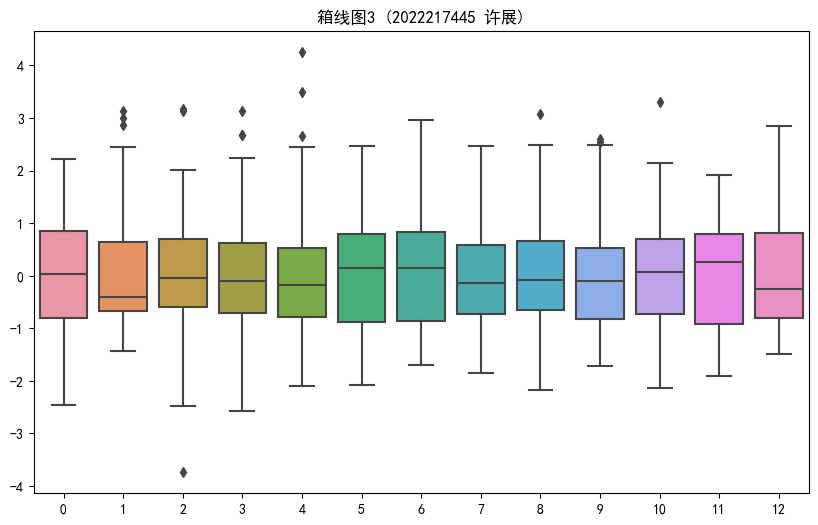

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=wineDataTrainScaler)
plt.title('箱线图3 (2022217445 许展)')
plt.show()

- 在下面我们再使用结合了 matplotlib 的 histplot 和 kdeplot的displot方法来绘制一个带密度估计的直方图。这对于可视化数据的分布非常有用，其中bins=30 参数用于设置直方图的箱数，kde=True 参数用于在直方图旁边绘制密度估计曲线。这样，可以同时看到数据的分布和密度估计，有助于理解数据的分布特性


- 从图中可以看出，各个类别的数据在特征值上的分布差异很大。有些类别的数据集中在某个特定的特征值上，而另一些类别的数据则更加分散。

<Figure size 1200x600 with 0 Axes>

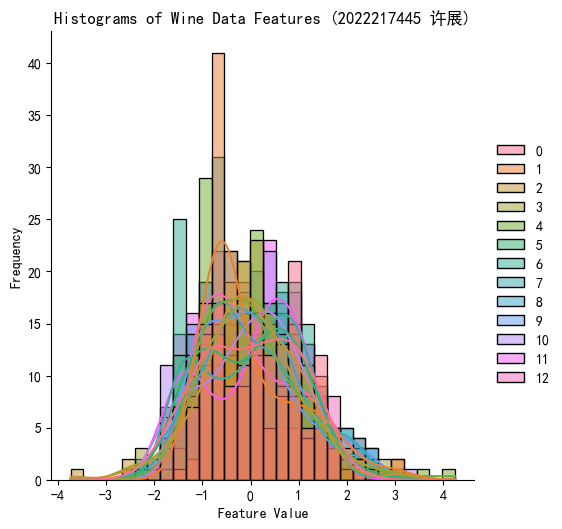

In [161]:
# 绘制直方图
plt.figure(figsize=(12, 6))
sns.displot(wineDataTrainScaler, bins=30, kde=True)
plt.title('Histograms of Wine Data Features (2022217445 许展)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

- 数据预处理的下一个步骤，我们对得到的两个样本进行PCA降维


- 在这里我们首先使用 GridSearchCV 来搜索不同的 n_components 值，并通过5折交叉验证来评估模型性能选出最佳参数，根据我们上面得到的wineDataTrainScaler和wineDataTestScaler两个样本作为我们此处操作的初始样本，通过Scaler训练样本对pca“规则”进行训练，然后将pca应用于Scaler的训练集样本和测试集样本

In [146]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# 假设wineDataTrainScaler是你的标准化后的训练集

# 创建PCA对象
pca = PCA()

# 定义参数范围，例如保留70%的方差
param_grid = {'n_components': [0.7, 0.8, 0.9, 0.95, 0.99]}

# 使用GridSearchCV进行交叉验证
grid_search = GridSearchCV(pca, param_grid, cv=5)
grid_search.fit(wineDataTrainScaler)

# 打印最佳参数
print("Best parameters found by grid search:", grid_search.best_params_)


Best parameters found by grid search: {'n_components': 0.99}


In [147]:
#generate the pca by the wineDataTrainScaler
pca=PCA(n_components=0.9).fit(wineDataTrainScaler)
#将pca应用于训练集
wineDataTrainPca=pca.transform(wineDataTrainScaler)
#将pca应用于测试集
wineDataTestPca=pca.transform(wineDataTestScaler)
print('after pca.transform:')
print("wineDataTrainPca.shape",wineDataTrainPca.shape)
print("wineDataTestPca.shape",wineDataTestPca.shape)

after pca.transform:
wineDataTrainPca.shape (160, 8)
wineDataTestPca.shape (18, 8)


### 降维后再看看

- 使用了 PCA 对象来计算每个主成分的解释方差比例，并使用 matplotlib 库来绘制这些比例的条形图，以便于理解每个主成分对原始数据方差的贡献程度。通过这个图表，可以看到随着主成分数量的增加，解释方差的比例如何变化，从而帮助在选择保留的主成分数量时做出决策


- 从中我们可以看到占比还是可以的，从3，4，到36一共占比92%，5折交叉验证暂时就这样定下

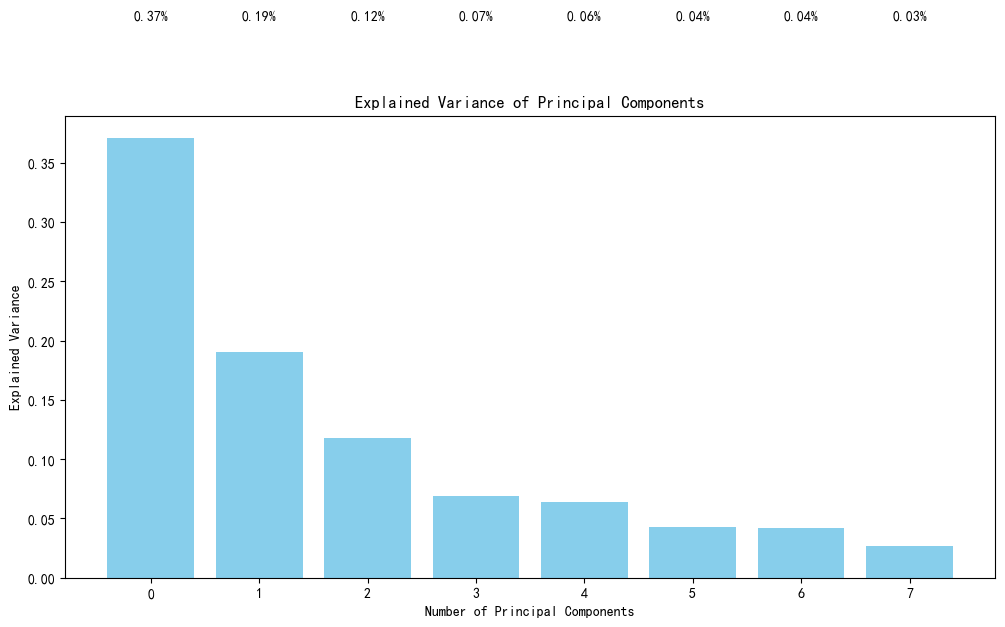

In [148]:
# 计算解释方差
explained_variance = pca.explained_variance_ratio_

# 绘制解释方差的比例
plt.figure(figsize=(12, 6))
for i, val in enumerate(explained_variance):
    x = i
    y = explained_variance.max() + 0.1  # 文本位置在最大贡献率上方
    plt.text(x, y, f"{val:.2f}%", ha='center')
plt.bar(range(len(explained_variance)), explained_variance, color='skyblue')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Principal Components')
plt.show()

## 构建模型
- 在这里呢我们分别要考虑使用哪个最终处理的数据集以及选择cluster的值，下面分别对两组数据集进行了2-10次聚类数目最优类次数，并使用FMI得分来及逆行对比，进行选择

In [149]:
#2-10次聚类数目最优类次数
# 初始化两个列表，分别用于存储原始数据集和 PCA 处理数据集的 FMI 得分
scores_scaler = []
scores_pca = []
inertia_scaler = []
inertia_pca = []

# 遍历不同的聚类数量
for i in range(2, 11):
    # 对原始数据集进行聚类
    kmeans = KMeans(n_clusters=i, random_state=23).fit(wineDataTrainScaler)
    scores_scaler.append(fowlkes_mallows_score(wineTargetTrain, kmeans.labels_))
    inertia_scaler.append(kmeans.inertia_)
    
    # 对 PCA 处理的数据集进行聚类
    kmeans = KMeans(n_clusters=i, random_state=23).fit(wineDataTrainPca)
    scores_pca.append(fowlkes_mallows_score(wineTargetTrain, kmeans.labels_))
    inertia_pca.append(kmeans.inertia_)

# 输出两个列表
print("原始数据集的 FMI 得分列表：", scores_scaler)
print("PCA 处理数据集的 FMI 得分列表：", scores_pca)

原始数据集的 FMI 得分列表： [0.6626496713818488, 0.9009718053014305, 0.8844272552887619, 0.7982756913388841, 0.718113705591554, 0.6397497534745058, 0.5764641616622284, 0.5477521523239846, 0.5543210379862612]
PCA 处理数据集的 FMI 得分列表： [0.6597147241346405, 0.9132662304853025, 0.7938138321762703, 0.7091253231887679, 0.6829058296438237, 0.6203045158943974, 0.5925850841082463, 0.5705312167017962, 0.5285600567134252]


- 那么通过观察折线图我们可以清楚地看出来这两种数据集都在cluster为3时得分最高，并且3到10之间可以看到在FMI得分评价的情况下未经过pca降维的数据表现得更好一点，那么如果在要深入的话我们可以考虑对pca降维的数据进行进一步改进。


- 但是呢，inertia的比较值可以看出来pca表现更好一点，那么具体选取哪个的话


- 如果区分不同类别的红酒是主要关注点，那么 FMI 可能更重要。如果寻找相似的红酒样本是主要关注点，那么 inertia 可能更重要。但是又说到但是，因为我们的cluster参数肯定是3的，那么在3的情况下，在综合代码跑了几次的情况下和pca的inertia更小，聚类更加紧凑的情况下，综上我还是选择了pca的数据样本进行。

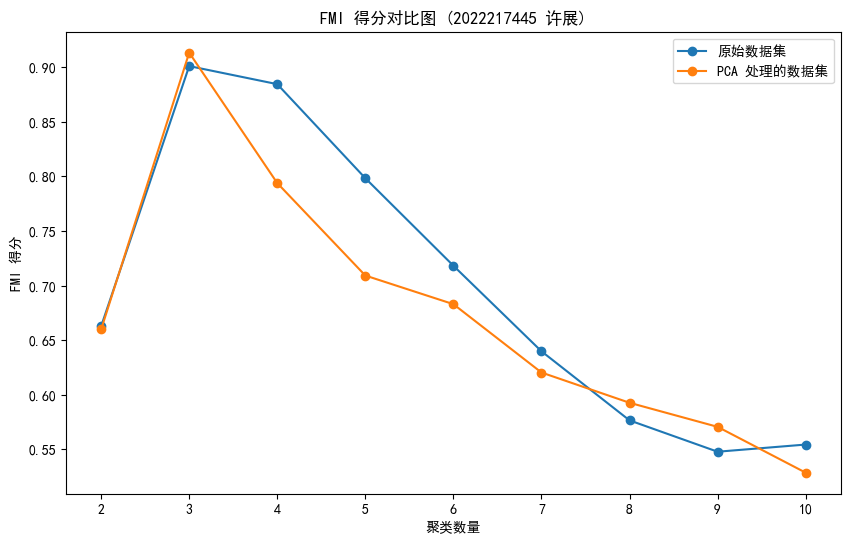

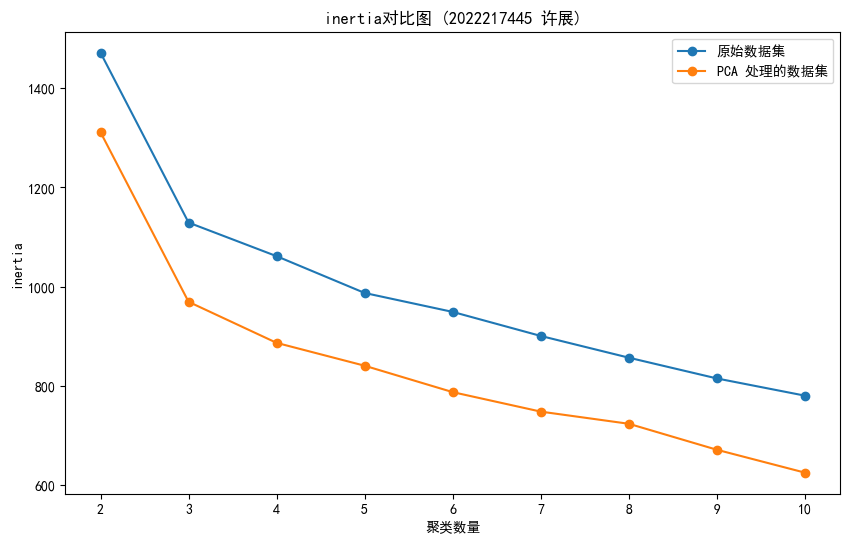

In [162]:
# 创建图表
plt.figure(figsize=(10, 6))

# 绘制原始数据集的 FMI 得分
plt.plot(range(2, 11), scores_scaler, label='原始数据集', marker='o')

# 绘制经过 PCA 处理的数据集的 FMI 得分
plt.plot(range(2, 11), scores_pca, label='PCA 处理的数据集', marker='o')

# 添加图例
plt.legend()

# 添加标题和 x、y 轴标签
plt.title('FMI 得分对比图 (2022217445 许展)')
plt.xlabel('聚类数量')
plt.ylabel('FMI 得分')

# 显示图表
plt.show()



# 创建图表
plt.figure(figsize=(10, 6))

# 绘制原始数据集的 FMI 得分
plt.plot(range(2, 11), inertia_scaler, label='原始数据集', marker='o')

# 绘制经过 PCA 处理的数据集的 FMI 得分
plt.plot(range(2, 11), inertia_pca, label='PCA 处理的数据集', marker='o')

# 添加图例
plt.legend()

# 添加标题和 x、y 轴标签
plt.title('inertia对比图 (2022217445 许展)')
plt.xlabel('聚类数量')
plt.ylabel('inertia')

# 显示图表
plt.show()

In [151]:
#构建模型
kmean=KMeans(n_clusters=3,random_state=23).fit(wineDataTrainPca)
print("The model\n",kmean)

The model
 KMeans(n_clusters=3, random_state=23)


## 最后的验证
- 这里我们在选择并构建玩模型之后再用轮廓系数（Silhouette Coefficient）和 Calinski-Harabasz 分数来验证一下3的选择

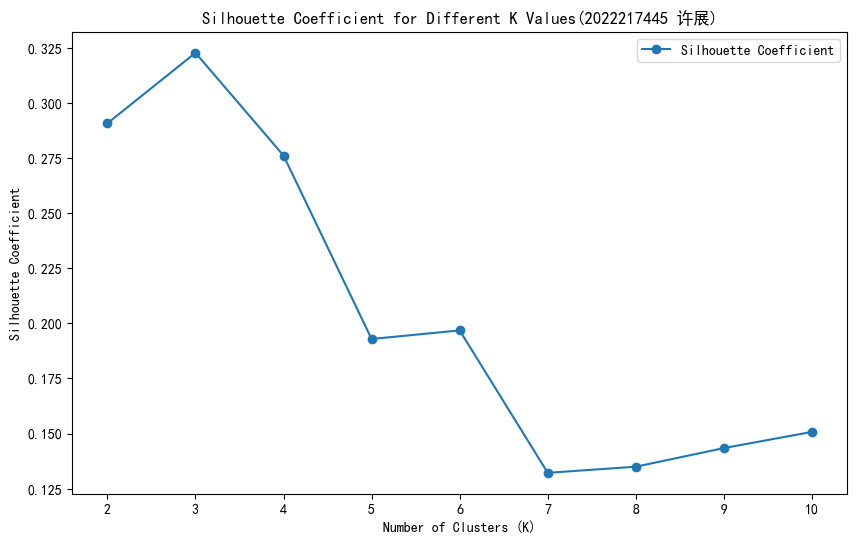

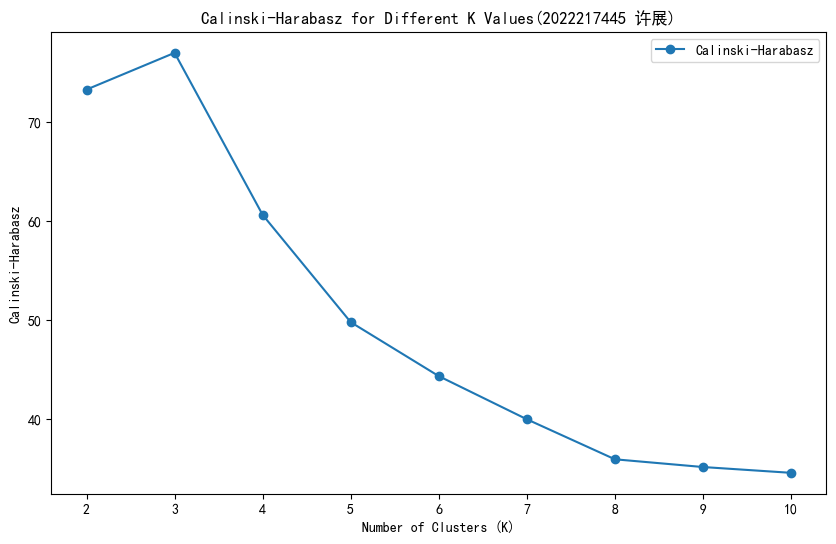

In [163]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 假设你的数据集是 wineData

# 创建一个列表来存储不同聚类数量下的指标值
scores = []

# 尝试不同的聚类数量
for n_clusters in range(2, 11):
    # 创建 KMeans 对象并拟合数据
    kmeans = KMeans(n_clusters=n_clusters, random_state=23)
    kmeans.fit(wineDataTrainPca)
    
    # 获取聚类分配
    labels = kmeans.labels_
    
    # 计算轮廓系数
    silhouette = silhouette_score(wineDataTrainPca, labels)
    
    # 计算 Calinski-Harabasz 分数
    ch = calinski_harabasz_score(wineDataTrainPca, labels)
    
    # 将指标值添加到列表中
    scores.append((n_clusters, silhouette, ch))

# 创建轮廓系数图表
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), [score[1] for score in scores], label='Silhouette Coefficient', marker='o')
plt.title('Silhouette Coefficient for Different K Values(2022217445 许展)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.legend()
plt.show()

# 创建 Calinski-Harabasz 分数图表
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), [score[2] for score in scores], label='Calinski-Harabasz', marker='o')
plt.title('Calinski-Harabasz for Different K Values(2022217445 许展)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz')
plt.legend()
plt.show()



- 验证完毕，结果正经，模型构建正确